In [ ]:
import os, sys
sys.path.append("C:/Users/isang/OneDrive/Desktop/DL/deep-learning-from-scratch-master")

import numpy as np
import matplotlib.pyplot as plt

from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# Load & Read MNIST Dataset
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [5]:
# Test Setting
weight_init_types = {'Kaiming' : 'relu', 'Xavier' : 'sigmoid'}
opitimizer = SGD(lr = 0.01)

networks = {}
train_loss = {}

for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size= 784,
                                  hidden_size_list = [100, 100, 100, 100],
                                  output_size = 10,
                                  weight_init_std = weight_type
                                  )
    train_loss[key] = []

In [ ]:
# Training
for epoch in range(2000):
    # Randomly choose 128 samples
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        opitimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if epoch % 100 == 0:
        print("===========" + "epoch:" + str(epoch) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========epoch:0===========
Kaiming:2.3805283307972043
Xavier:2.296443205884054
===========epoch:100===========
Kaiming:1.5724395765540966
Xavier:2.237045273371177
===========epoch:200===========
Kaiming:0.8682435147897237
Xavier:2.0962867259376923
===========epoch:300===========
Kaiming:0.4309799426312949
Xavier:1.7666654259991341
===========epoch:400===========
Kaiming:0.28007971722427477
Xavier:1.2558682740996272
===========epoch:500===========
Kaiming:0.324564382033237
Xavier:0.9061021317099933
===========epoch:600===========
Kaiming:0.29895460102218824
Xavier:0.5994891935948107
===========epoch:700===========
Kaiming:0.19119296830454718
Xavier:0.4144122021198333
===========epoch:800===========
Kaiming:0.22066775311451312
Xavier:0.468874758225874
===========epoch:900===========
Kaiming:0.2415355803751461
Xavier:0.43158990298745625
===========epoch:1000===========
Kaiming:0.2759859575011253
Xavier:0.46801001471725834
===========epoch:1100===========
Kaiming:0.19273868112262754
Xav

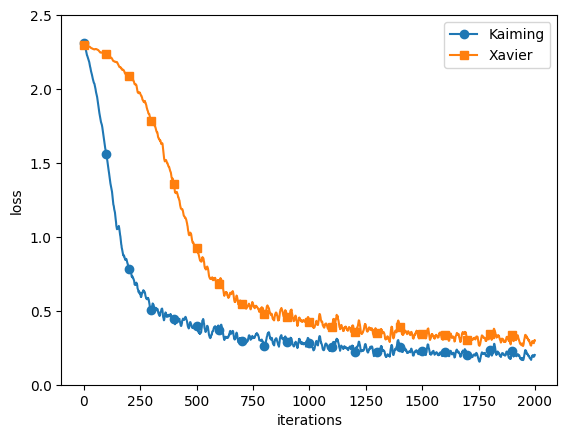

In [8]:
# Visualization
markers = {'Kaiming' : 'o', 'Xavier' : 's'}
x = np.arange(2000)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()